In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from DataCleaning import open_and_manage
url = "../quick_clean.csv"
df = open_and_manage(url)

In [29]:
# pd.options.display.max_columns = None
df.tail()

,id,type,subtype,price,zip_code,cuisine_type,constructionYear,condition,heatingType,room_number,atticExists,basementExists,hasSwimmingPool,nbr_parking_indoor,nbr_parking_outdoor,company_name,square_metres,city,region,price_by_m2,region_Bruxelles,region_Flanders,region_Wallonia,heating_carbon,heating_electric,heating_fueloil,heating_gas,heating_pellet,heating_solar,heating_wood,condition_as new,condition_good,condition_just renovated,condition_to be done up,condition_to renovate,condition_to restore,cuisine_No infos,cuisine_hyper equipped,cuisine_installed,cuisine_not installed,cuisine_semi equipped,cuisine_usa hyper equipped,cuisine_usa installed,cuisine_usa semi equipped,cuisine_usa uninstalled,subtype_apartment,subtype_apartment block,subtype_apartment group,subtype_bungalow,subtype_castle,subtype_chalet,subtype_country cottage,subtype_duplex,subtype_exceptional property,subtype_farmhouse,subtype_flat studio,subtype_ground floor,subtype_house,subtype_house group,subtype_kot,subtype_loft,subtype_manor house,subtype_mansion,subtype_mixed use building,subtype_other property,subtype_penthouse,subtype_service flat,subtype_town house,subtype_triplex,subtype_villa,type_apartment,type_house
19850,8128634,house,house,435200.0,2550,hyper equipped,2019.0,as new,gas,3.0,0,0,0,NaN,NaN,immo vertommen,140,Kontich Waarloos,Flanders,3108.571429,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19851,8907618,house,house,420000.0,5640,No infos,NaN,as new,fueloil,0.0,0,0,0,NaN,NaN,century 21 beaux villages,1000,Mettet,Wallonia,420.000000,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19852,8954484,house,mansion,450000.0,2018,No infos,NaN,as new,fueloil,6.0,0,1,0,NaN,NaN,era stadsgoed,253,Anvers,Flanders,1778.656126,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
19853,9001418,house,apartment block,450000.0,9500,installed,NaN,to be done up,gas,5.0,0,0,0,1.0,NaN,groep bg,5,Grammont,Flanders,90000.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19854,8907992,house,house,420000.0,5621,No infos,NaN,to be done up,fueloil,0.0,0,0,0,NaN,NaN,century 21 beaux villages,1000,Morialmé,Wallonia,420.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
df.shape

(19855, 72)

# Are there any outliers? If yes, which ones and why?

In [31]:
room_outliers = df[np.abs(df.room_number-df.room_number.mean()) > (3*df.room_number.std())]
room_outliers[["id","room_number","square_metres"]].sort_values(by="room_number", ascending=False).head()

,id,room_number,square_metres
6283,8715085,204.0,204
8103,8919065,204.0,204
7814,8818453,204.0,204
17491,8784255,165.0,165
18089,8951414,100.0,8800


In [32]:
parking_in_outliers = df[np.abs(df.nbr_parking_indoor-df.nbr_parking_indoor.mean()) > (3*df.nbr_parking_indoor.std())]
parking_in_outliers[["id","nbr_parking_indoor","square_metres"]].head()

,id,nbr_parking_indoor,square_metres
3226,8944138,35000.0,106


In [33]:
parking_out_outliers = df[np.abs(df.nbr_parking_outdoor-df.nbr_parking_outdoor.mean()) > (3*df.nbr_parking_outdoor.std())]
parking_out_outliers[["id","nbr_parking_outdoor","square_metres"]].sort_values(by="nbr_parking_outdoor", ascending=False).head(10)

,id,nbr_parking_outdoor,square_metres
678,8372213,250.0,93
470,8773002,250.0,69
520,9007599,250.0,83
356,8318891,202.0,84
193,8972719,109.0,69
77,9007296,100.0,118
5460,9027328,100.0,65
5053,8978908,100.0,90
14981,8869798,100.0,850
15958,8489907,100.0,655


In [34]:
print(f"Number of room outliers : {len(room_outliers)}")
print(f"Number of indoor parking outliers : {len(parking_in_outliers)}")
print(f"Number of outdoor parking outliers : {len(parking_out_outliers)}")

Number of room outliers : 44
Number of indoor parking outliers : 1
Number of outdoor parking outliers : 85


Text(0.5, 1.0, 'Distribution of room number')

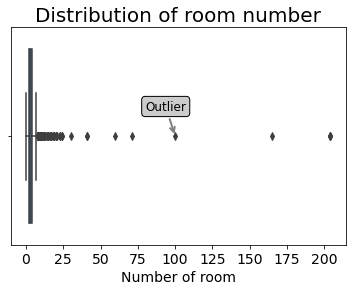

In [35]:
# box plot of the variable room_number
ax = sns.boxplot(df.room_number)

# notation indicating an outlier
ax.annotate('Outlier', xy=(100,0), xytext=(80,-0.12), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Number of room', fontsize=14)
plt.title('Distribution of room number', fontsize=20)

Text(0.5, 1.0, 'Distribution of indoor parking')

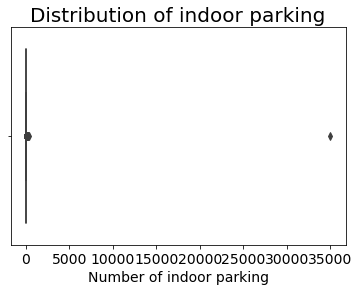

In [36]:
ax = sns.boxplot(df.nbr_parking_indoor)
plt.xticks(fontsize=14)
plt.xlabel('Number of indoor parking', fontsize=14)
plt.title('Distribution of indoor parking', fontsize=20)

Text(0.5, 1.0, 'Distribution of outdoor parking')

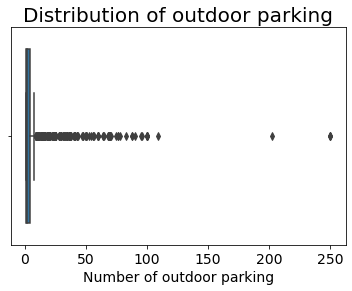

In [37]:
ax = sns.boxplot(df.nbr_parking_outdoor)
plt.xticks(fontsize=14)
plt.xlabel('Number of outdoor parking', fontsize=14)
plt.title('Distribution of outdoor parking', fontsize=20)

In [38]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'room_number'.
# df[np.abs(df.room_number-df.room_number.mean()) <= (3*df.room_number.std())]

### Delete wrong values

In [39]:
# Delete rows when the number of room is equals or greater than square meters
df = df[df.room_number < df.square_metres]
df[["id","room_number","square_metres","price"]].sort_values(by="room_number", ascending=False)

,id,room_number,square_metres,price
18089,8951414,100.0,8800,15000000.0
15436,8820666,60.0,8521,1100000.0
10481,7701432,41.0,2049,5200000.0
10482,7701433,41.0,2049,5200000.0
11243,9029547,30.0,415,550000.0
...,...,...,...,...
3810,8997835,0.0,41,170000.0
18359,9021045,0.0,296,120000.0
18357,8912294,0.0,93,139000.0
3788,8960382,0.0,40,99000.0


In [40]:
# Delete rows when the number of parking indoor is equals or greater than square meters
df = df[(df.nbr_parking_indoor < df.square_metres) | (df.nbr_parking_indoor.isna())]
df[["id","nbr_parking_indoor","square_metres","price"]].sort_values(by="nbr_parking_indoor", ascending=False)

,id,nbr_parking_indoor,square_metres,price
1521,8956263,126.0,238,775000.0
4459,8956261,126.0,164,625000.0
513,9019385,100.0,110,259000.0
561,8479154,95.0,96,366250.0
5700,8411268,70.0,182,695000.0
...,...,...,...,...
19847,8822100,NaN,168,398050.0
19850,8128634,NaN,140,435200.0
19851,8907618,NaN,1000,420000.0
19852,8954484,NaN,253,450000.0


In [41]:
# Delete rows when the number of parking outdoor is equals or greater than square meters
df = df[(df.nbr_parking_outdoor < df.square_metres) | (df.nbr_parking_outdoor.isna())]
df[["id","nbr_parking_outdoor","square_metres","price"]].sort_values(by="nbr_parking_outdoor", ascending=False)

,id,nbr_parking_outdoor,square_metres,price
77,9007296,100.0,118,318000.0
15958,8489907,100.0,655,750000.0
14981,8869798,100.0,850,2900000.0
561,8479154,95.0,96,366250.0
6614,8874517,76.0,86,249500.0
...,...,...,...,...
19847,8822100,NaN,168,398050.0
19850,8128634,NaN,140,435200.0
19851,8907618,NaN,1000,420000.0
19852,8954484,NaN,253,450000.0


# In your opinion, which 5 variables are the most important and why?

### A discuter  
prix/m2  
city+region  
condition  

# What are the most expensive municipalities in Belgium?

Text(0, 0.5, 'Price by m²')

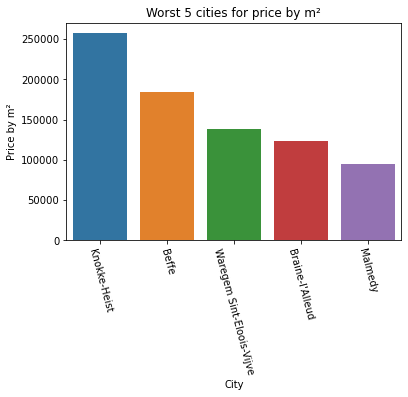

In [44]:
city = df.sort_values(by="price_by_m2", ascending=False)
plt.figure(1)
sns.barplot(x='city', y='price_by_m2', data=city.head())
plt.xticks(rotation=-75)
plt.title("Worst 5 cities for price by m²")
plt.xlabel("City")
plt.ylabel("Price by m²")